# Ceneo analyzer

## Loading libraries

In [29]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Listing codes for all products for which opinions have been extracted

In [30]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

108290707
33302873


## Specifying opinions about which product are to be analyzed

In [31]:
product_id = input("Please provide Ceneo.pl product code: ")

## Importing opinions from JSON file to pandas.DataFrame object

In [32]:
MAX_SCORE = 5
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.score =  opinions.score.apply(lambda s: round(s*MAX_SCORE, 1))

## Basic statistics

In [33]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_score = opinions.score.mean()*MAX_SCORE
average_score

20.97826086956522

## Basic charts

### Opinons score histogram

[Text(0, 0, '0.5'),
 Text(1, 0, '1.0'),
 Text(2, 0, '1.5'),
 Text(3, 0, '2.0'),
 Text(4, 0, '2.5'),
 Text(5, 0, '3.0'),
 Text(6, 0, '3.5'),
 Text(7, 0, '4.0'),
 Text(8, 0, '4.5'),
 Text(9, 0, '5.0')]

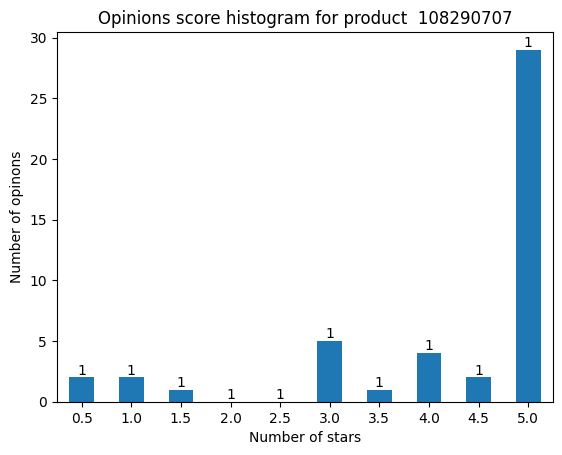

In [34]:
score_distribution = opinions.score.value_counts().reindex(np.arange(0.5,5.5,0.5))
fig, ax = plt.subplots()
score_distribution.plot.bar()
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(1) if 1 > 0 else '')
ax.set_xlabel("Number of stars")
ax.set_ylabel("Number of opinons")
ax.set_title(f"Opinions score histogram for product  {product_id}")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

### Opinoins recommendations share

Text(0.5, 1.0, 'Opinions recommencations share for product 108290707')

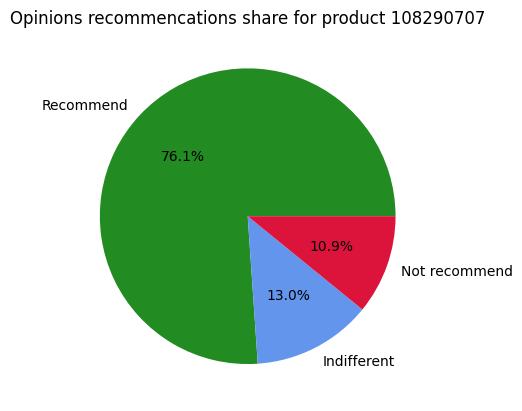

In [35]:
recommendation_distribution  = opinions.recommendation.value_counts(dropna=False).reindex([1,np.nan,0])
flg, ax = plt.subplots()
recommendation_distribution.plot.pie(
    autopct  = "%1.1f%%",
    labels = ["Recommend", "Indifferent", "Not recommend"],
    colors = ["forestgreen", "cornflowerblue", "crimson"],
    label = ''
)
ax.set_title(f"Opinions recommencations share for product {product_id}")